In [45]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors 
import dunestyle.matplotlib as dunestyle


In [46]:
def resultsTOtxt(arr,  filename):
#arr is the concatenated and transposed array of all the arrays wished to be written
#arrDescription a string describing and is each collumn of the file
#writes out each array concatenated in arr as an collumn in the file
    file = open(filename, 'w')
    np.savetxt(filename, arr, delimiter=' ')
    file.close()
    
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e8 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result

In [47]:
path = '/media/leoperes/Acer/Users/le0_p/'

In [48]:
def ReadNuclearModelSamples(IsBDM, massANDboost=None):
    if IsBDM:
        fBDM_00a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_'+massANDboost+'_00a.root')
        if massANDboost != 'm20_b10':
            fBDM_01a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01a_newVertex/bdm_'+massANDboost+'_01a.root')
        fBDM_02a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02a_newVertex/bdm_'+massANDboost+'_02a.root')
        fBDM_00b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00b_newVertex/bdm_'+massANDboost+'_00b.root')
        fBDM_01b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01b_newVertex/bdm_'+massANDboost+'_01b.root')
        fBDM_02b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02b_newVertex/bdm_'+massANDboost+'_02b.root')
        if massANDboost != 'm20_b10':
            samples = [fBDM_00a, fBDM_01a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
        else:
            samples = [fBDM_00a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
        return samples
    if not IsBDM:
        fAtm_00a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
        fAtm_01a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01a_newVertex/atm_hA_LFG.root')
        fAtm_02a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02a_newVertex/atm_hA_ESF.root')
        fAtm_00b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00b_newVertex/atm_hN_BR.root')
        fAtm_01b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01b_newVertex/atm_hN_LFG.root')
        fAtm_02b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02b_newVertex/atm_hN_ESF.root')
        samples = [fAtm_00a, fAtm_01a, fAtm_02a, fAtm_00b, fAtm_01b, fAtm_02b]
        return samples

In [49]:
listsamples = ['m05_b1p1', 'm05_b1p5', 'm05_b10', 'm10_b1p1', 'm10_b1p5', 'm10_b10', 'm20_b1p1', 'm20_b1p5', 'm20_b10', 'm40_b1p1', 'm40_b1p5', 'm40_b10']
list_samples_latex = [r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=10$' ]
list_nuclearmodels = ['hA_BR','hA_LSF', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']

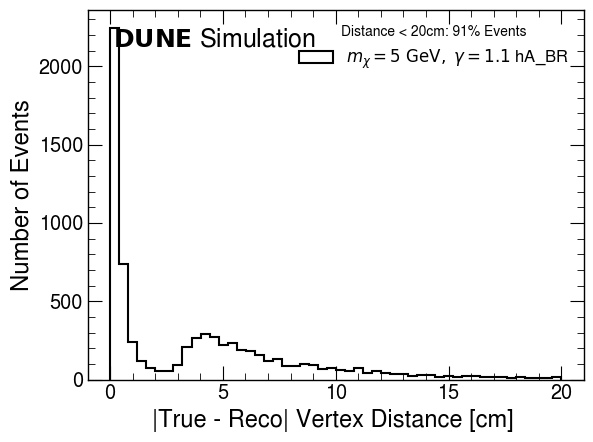

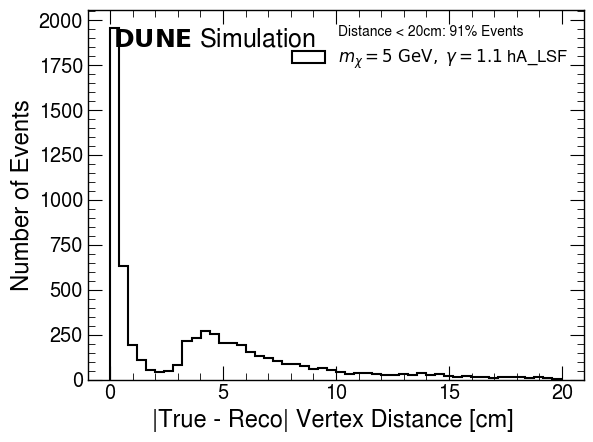

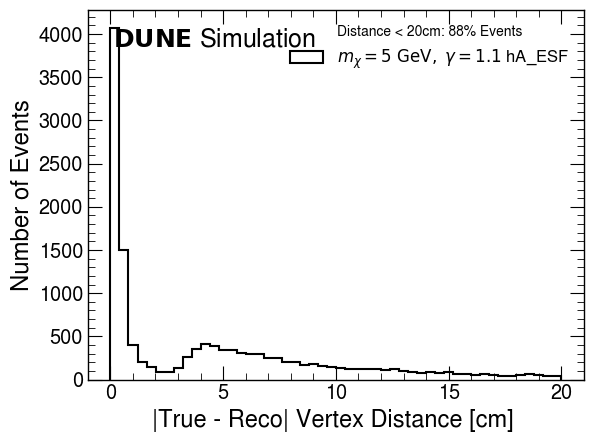

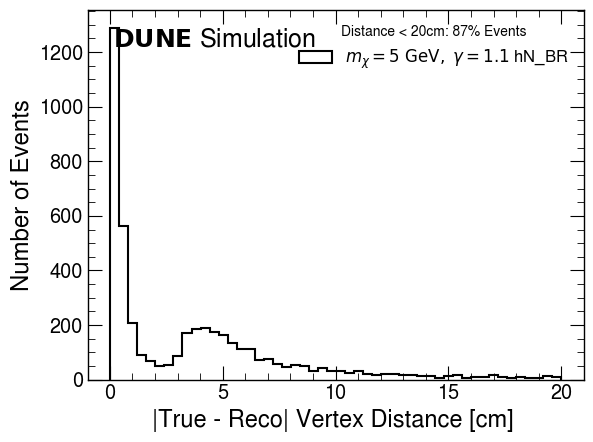

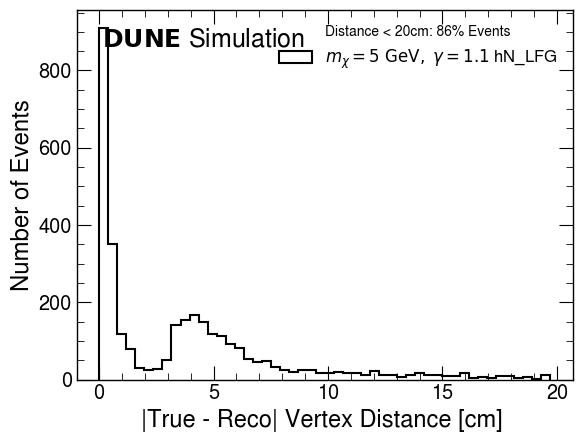

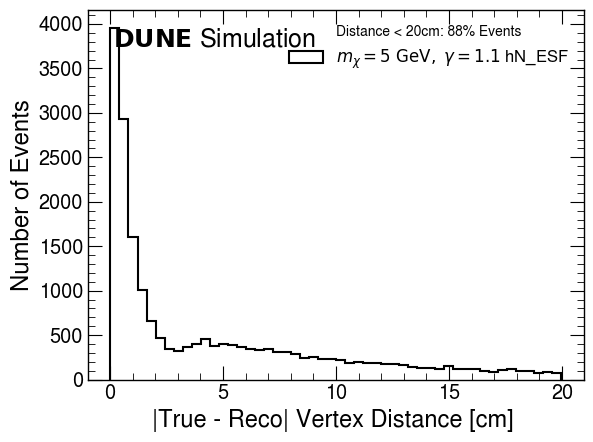

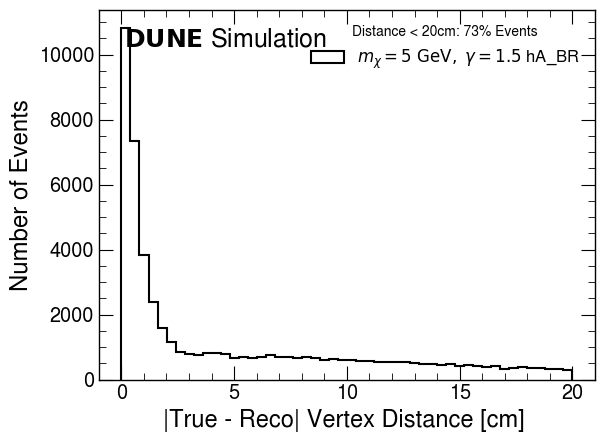

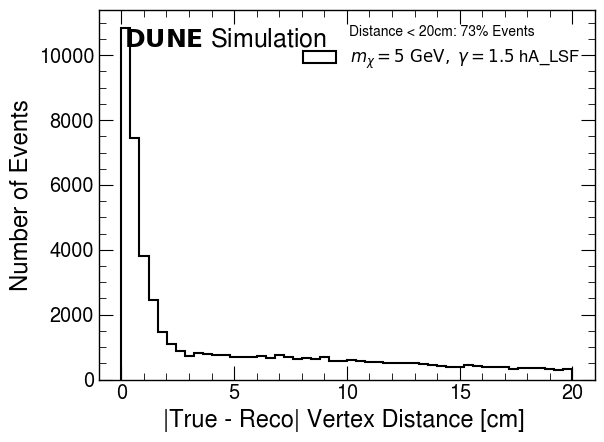

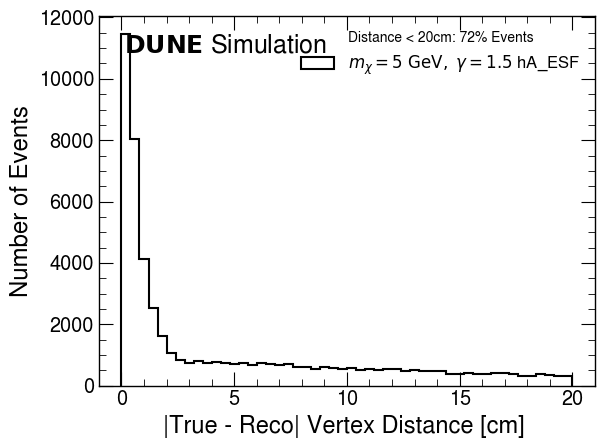

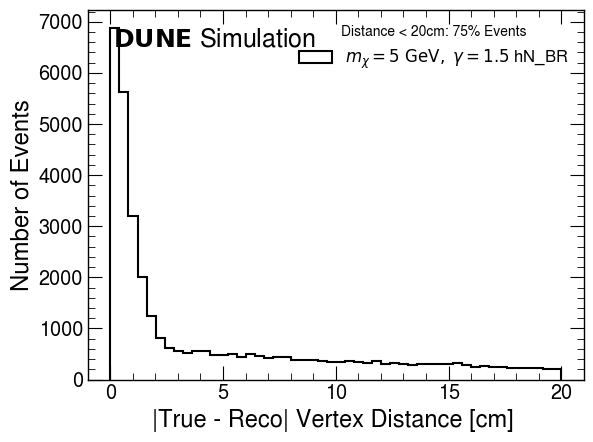

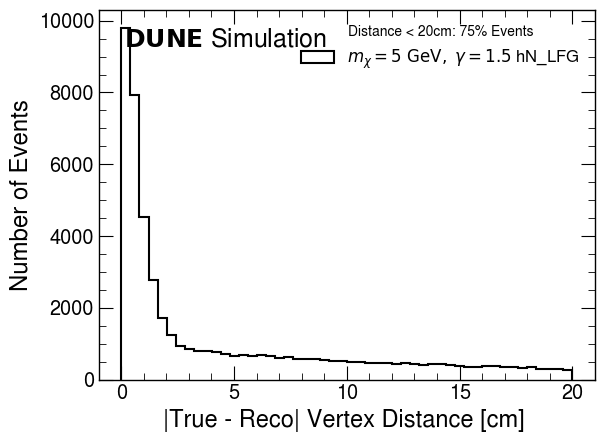

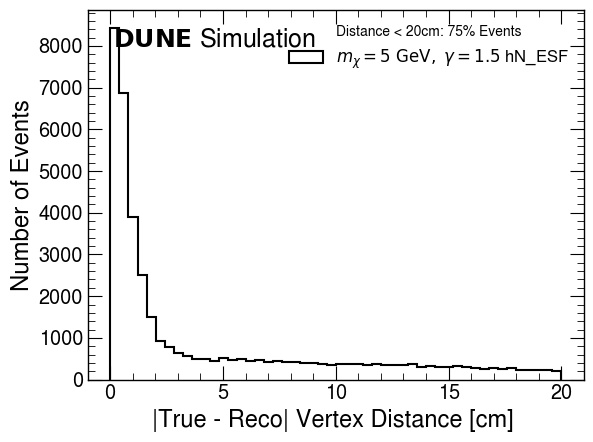

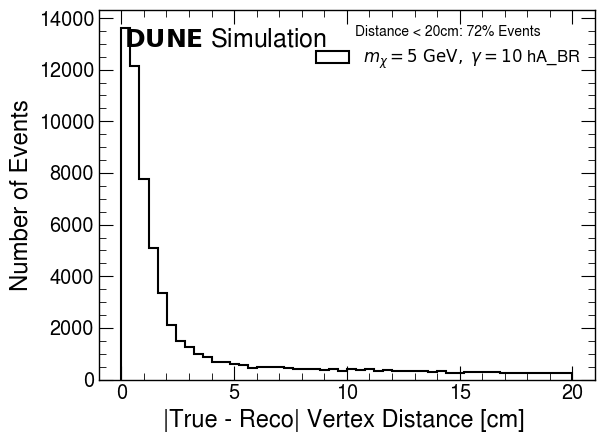

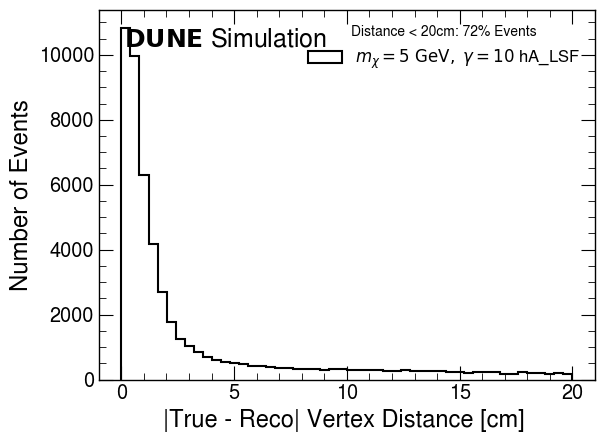

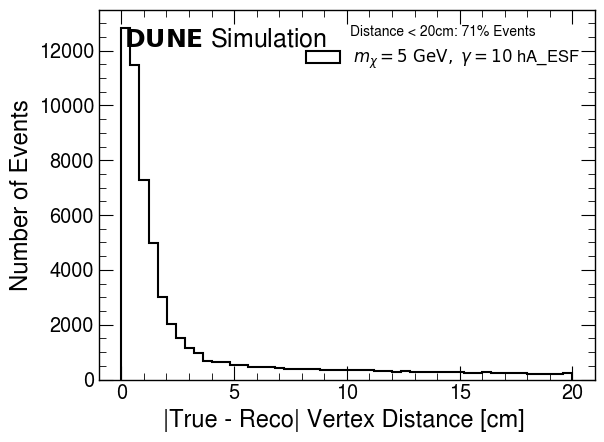

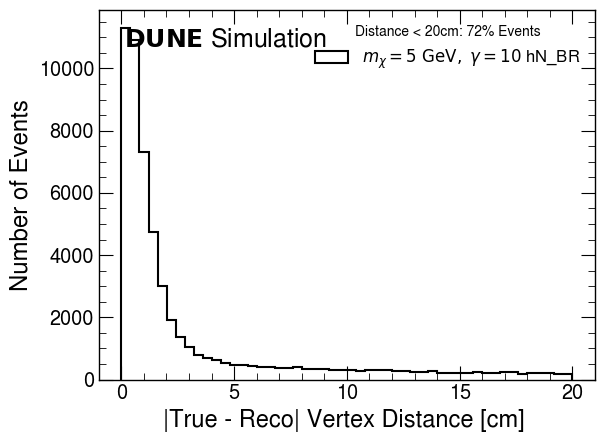

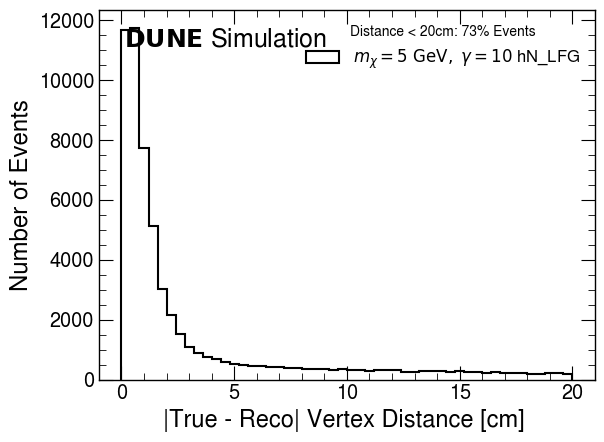

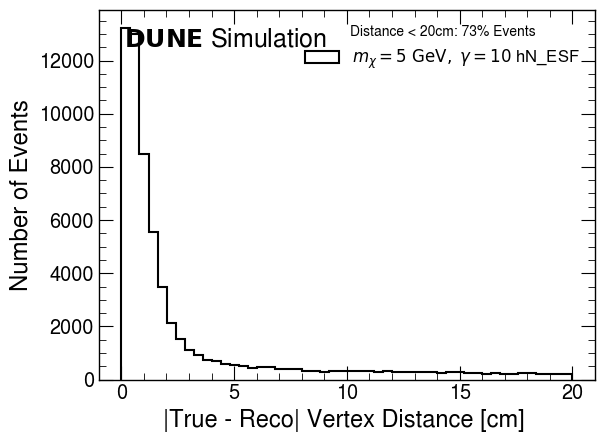

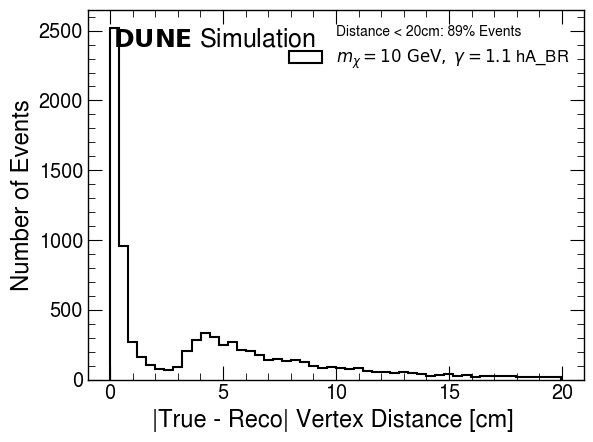

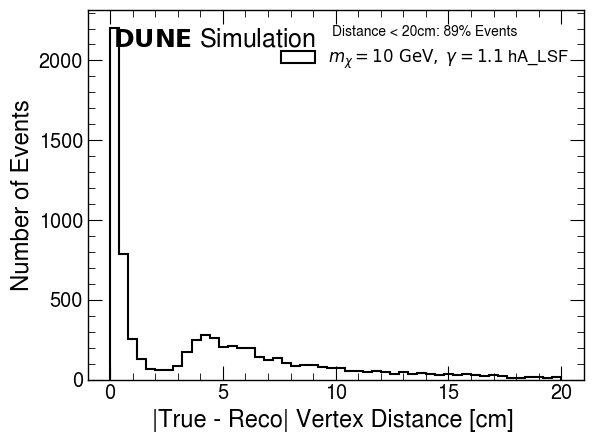

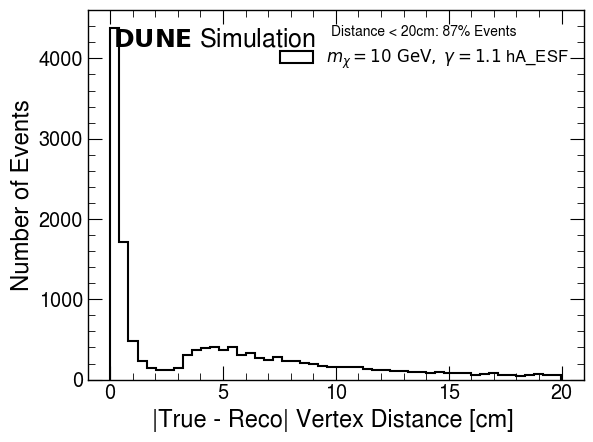

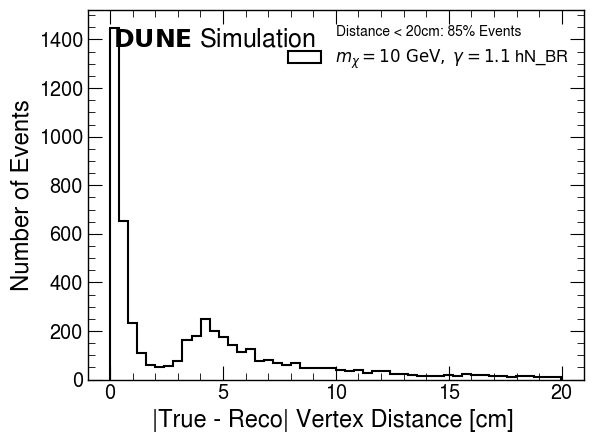

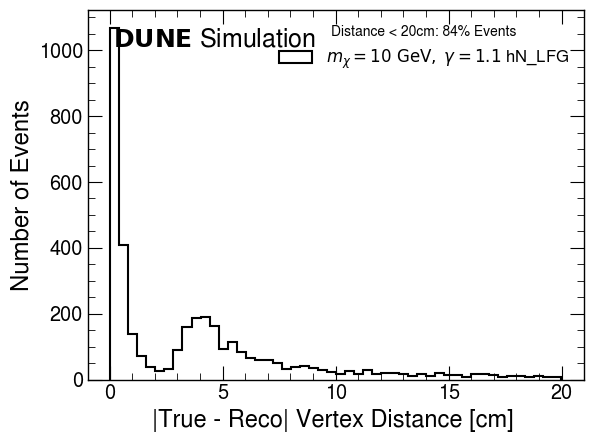

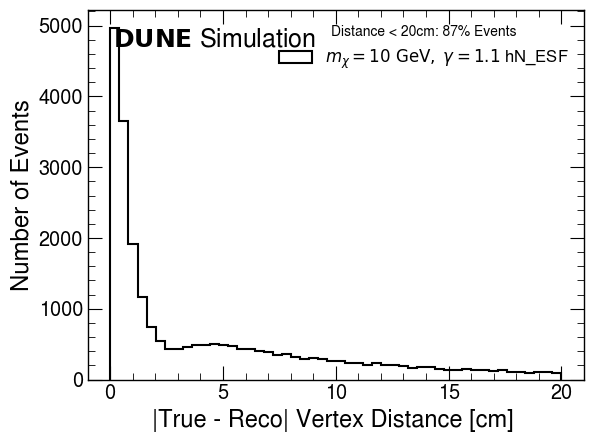

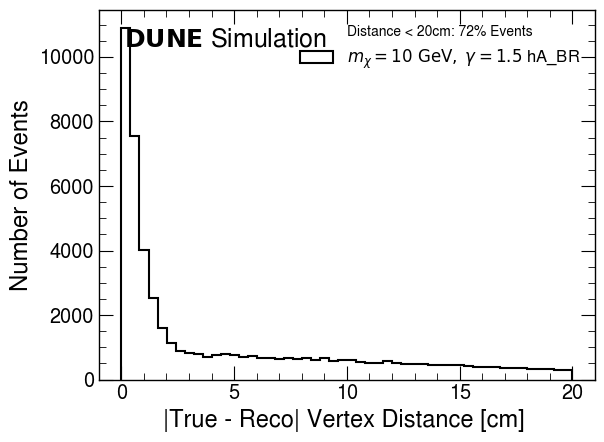

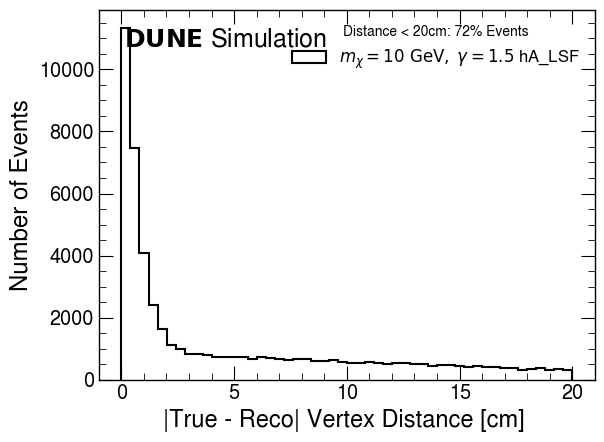

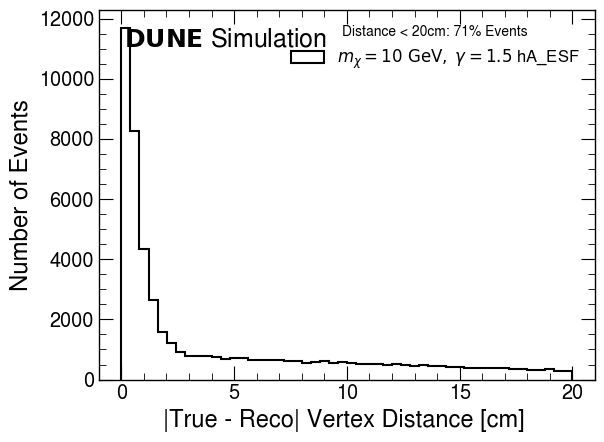

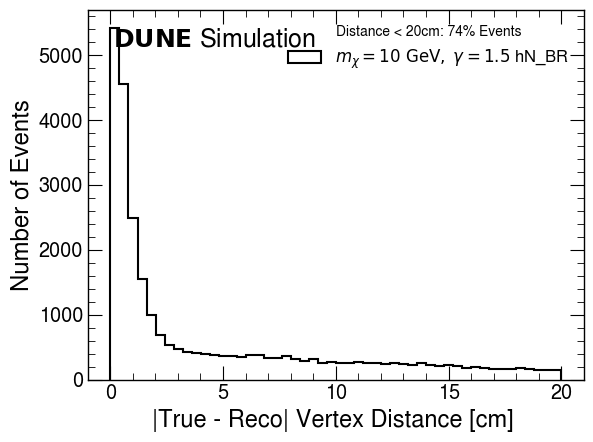

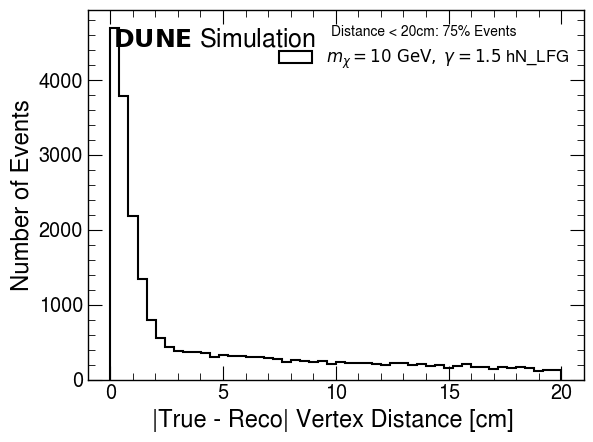

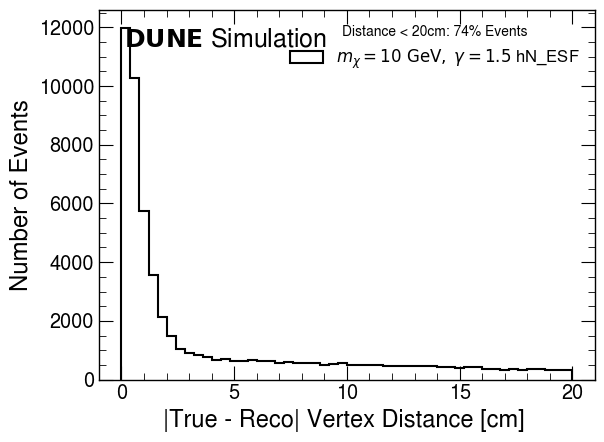

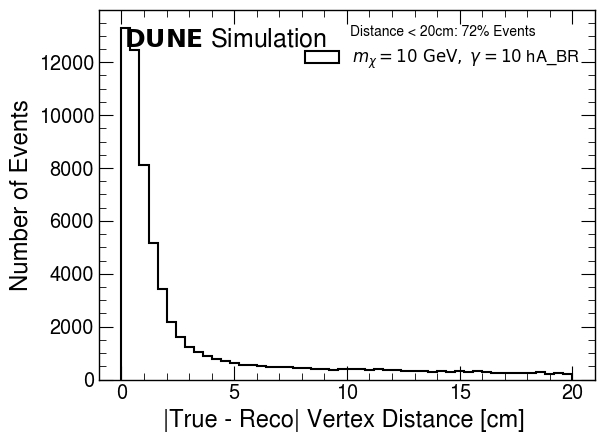

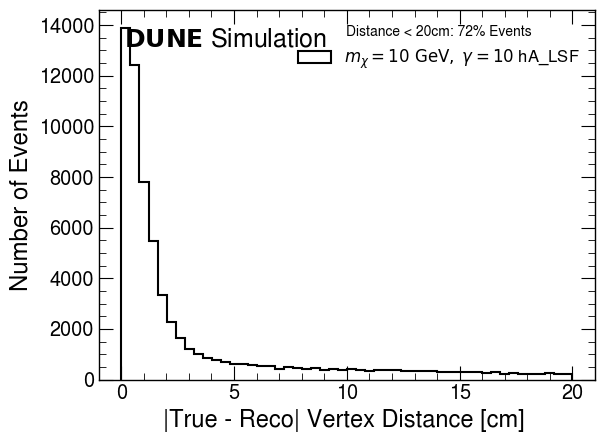

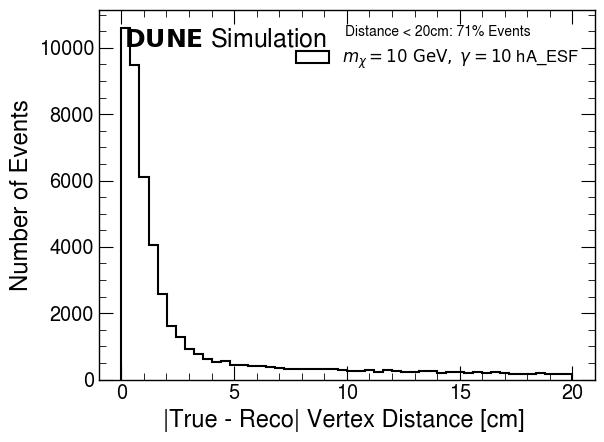

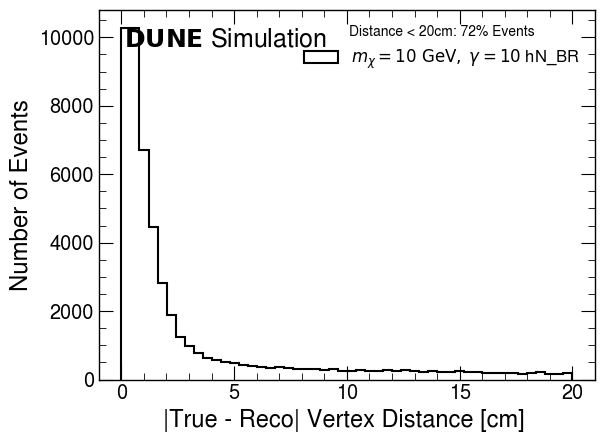

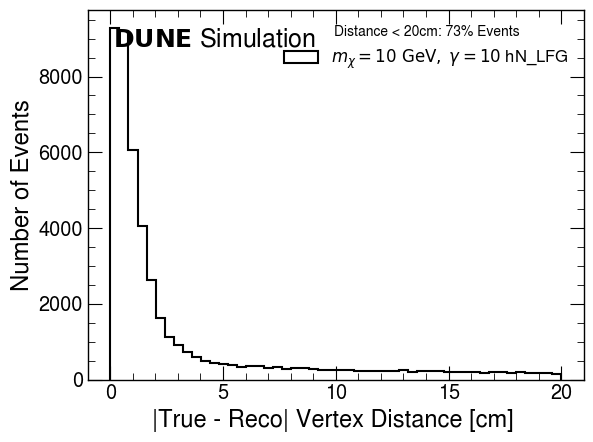

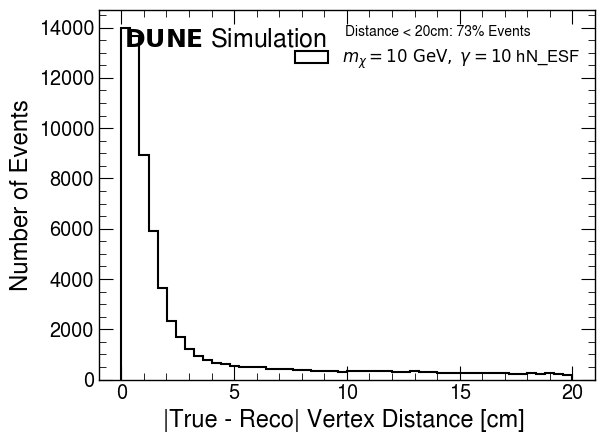

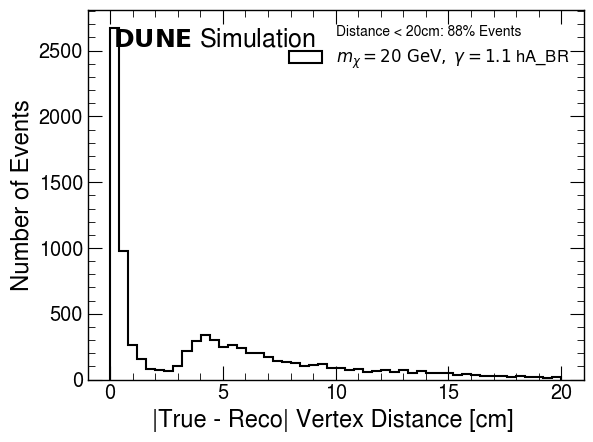

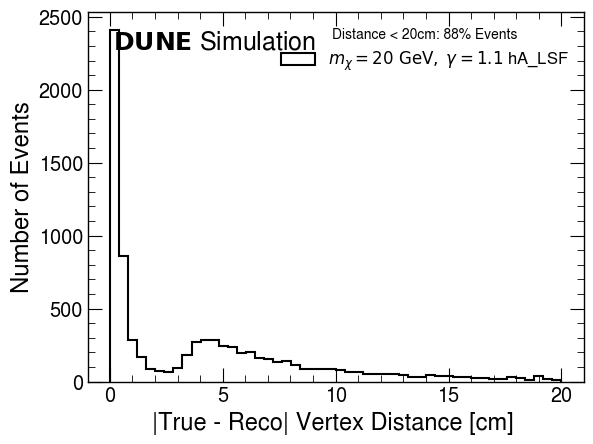

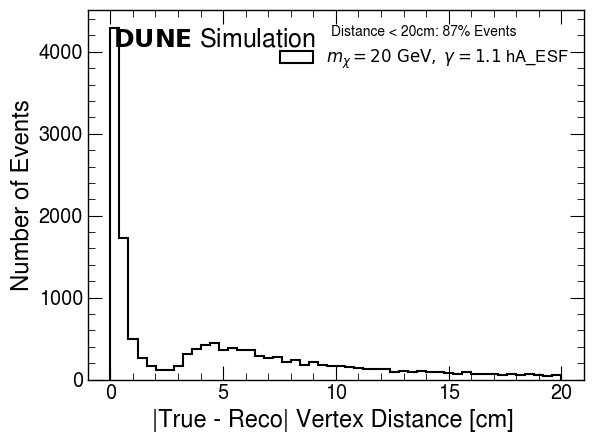

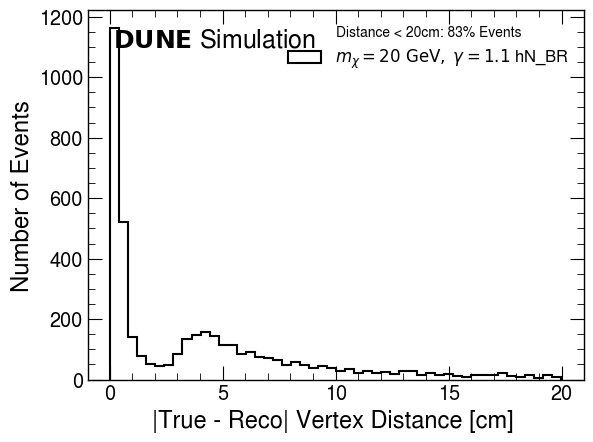

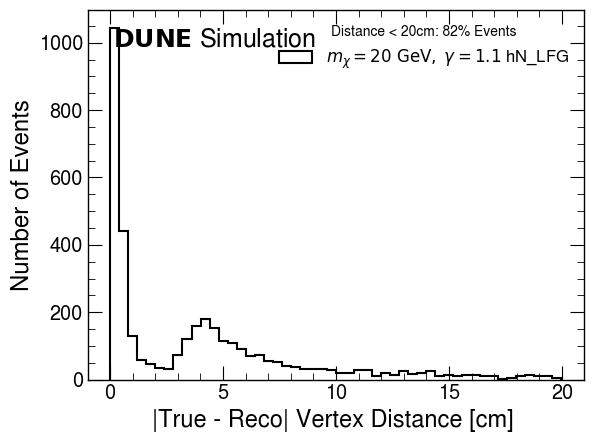

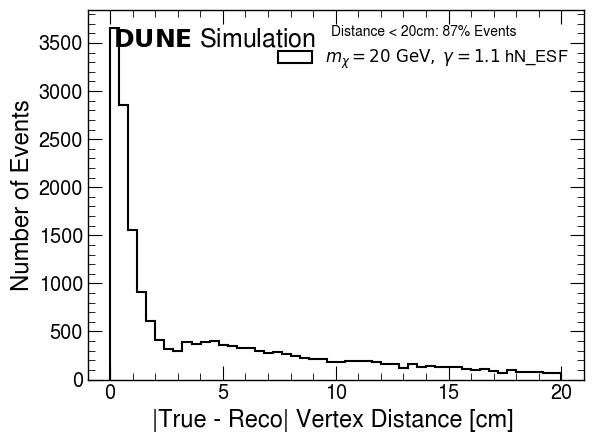

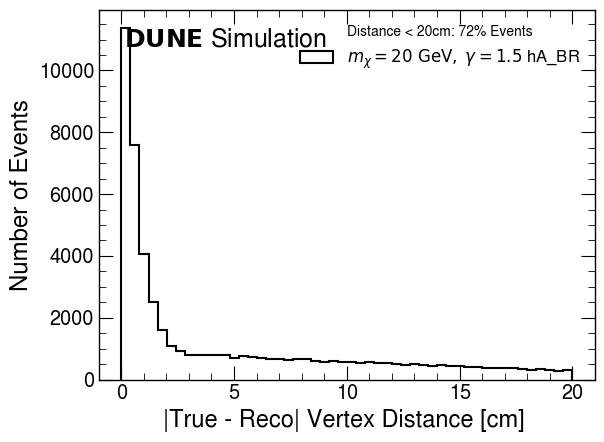

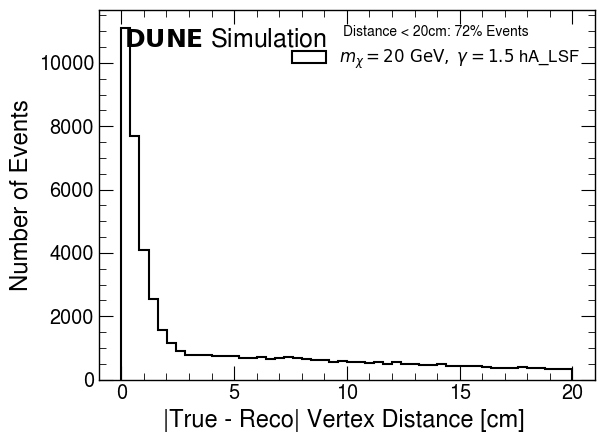

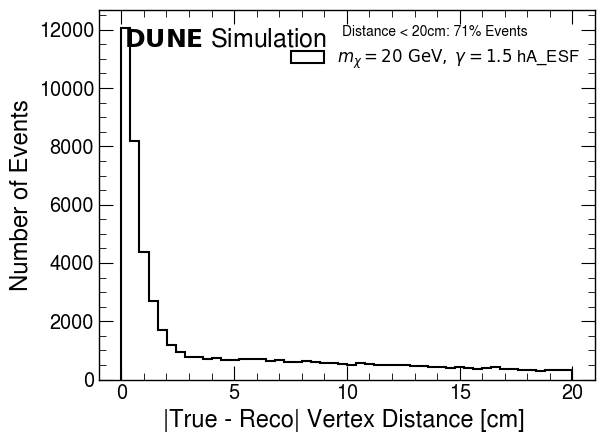

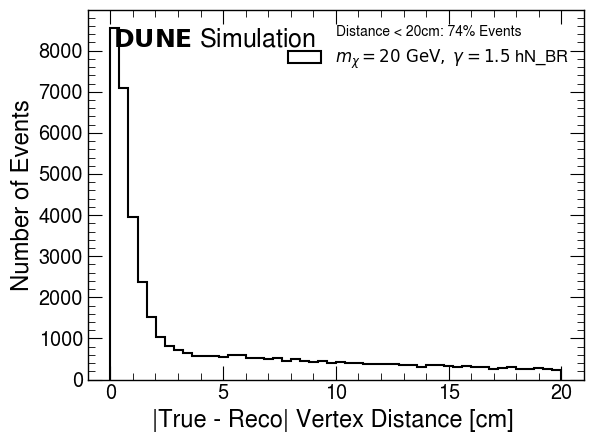

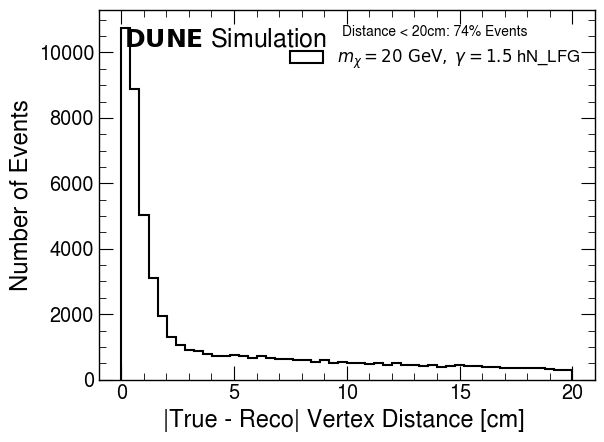

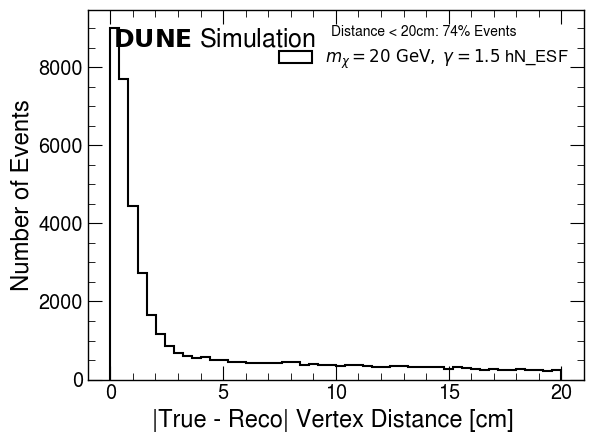

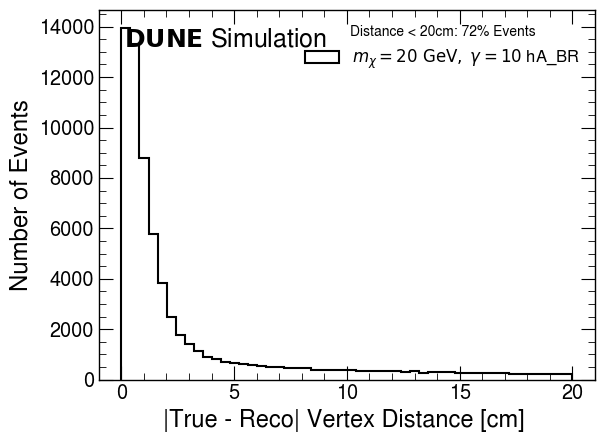

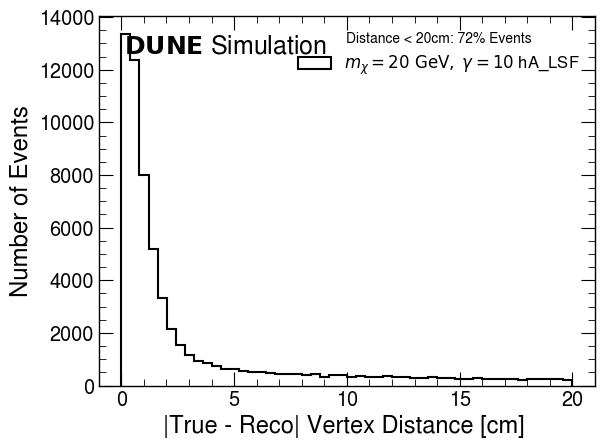

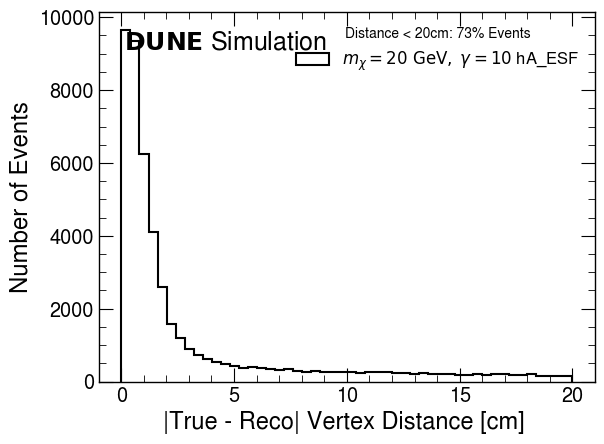

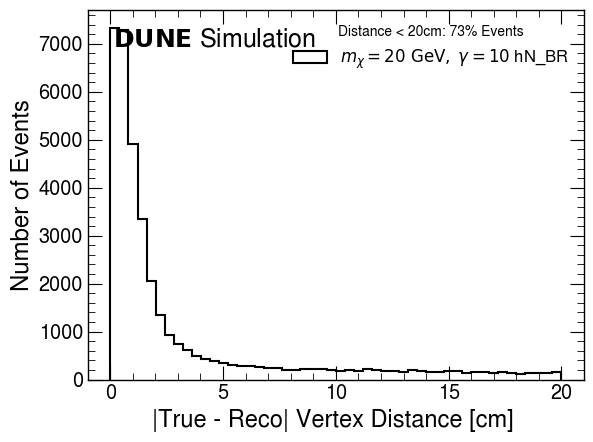

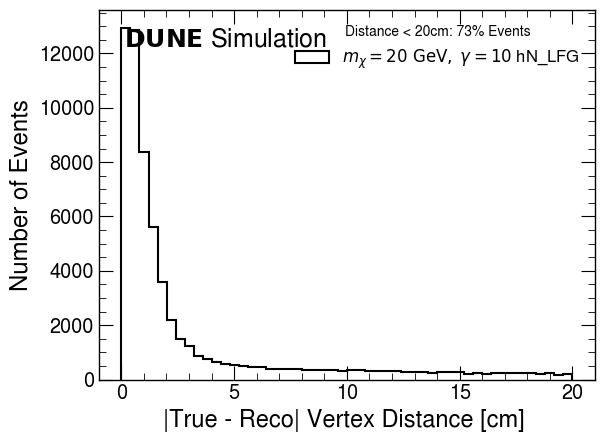

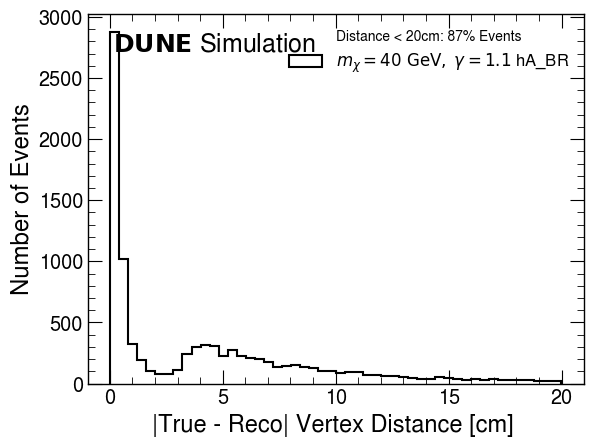

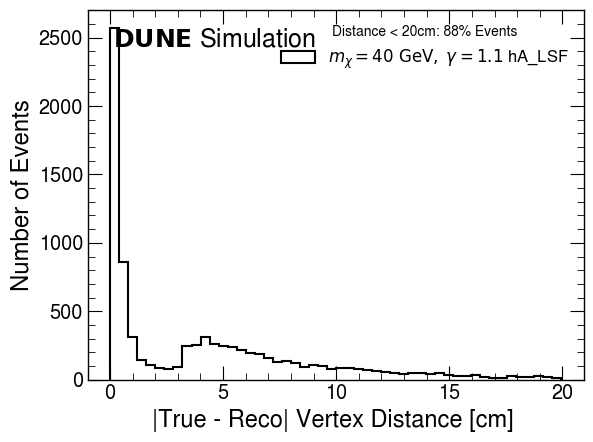

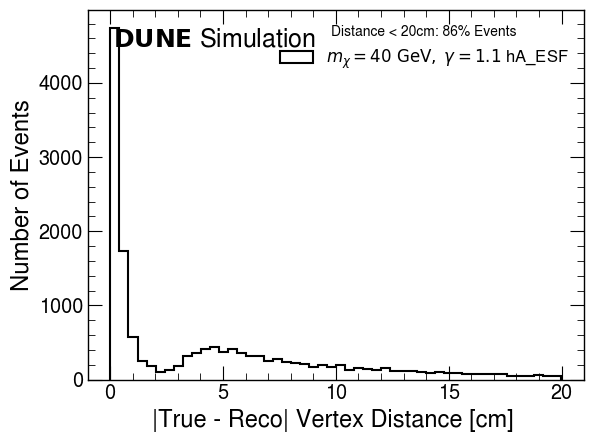

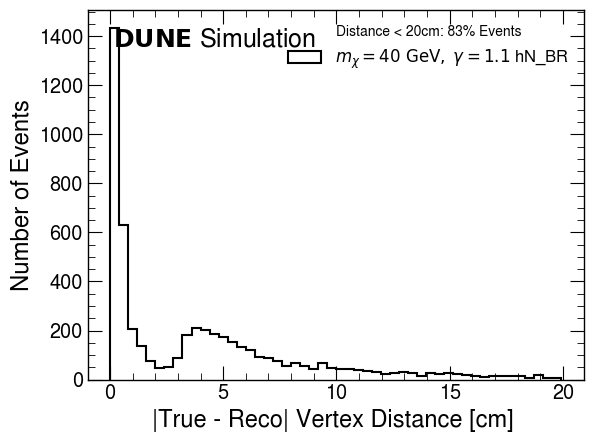

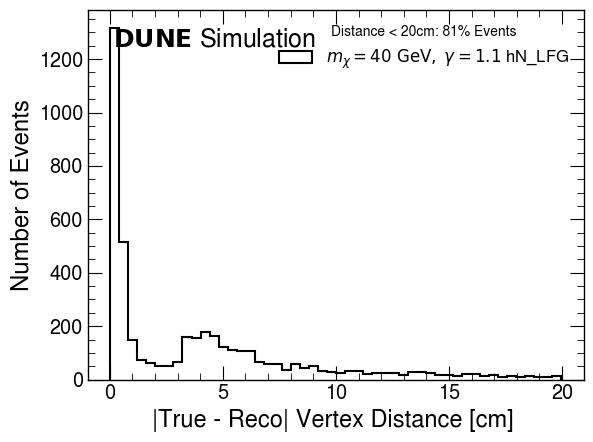

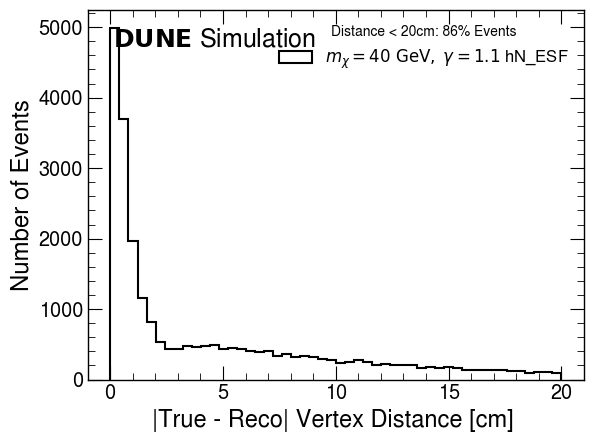

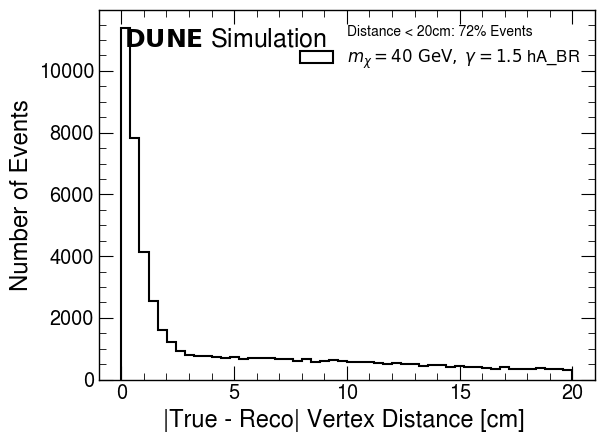

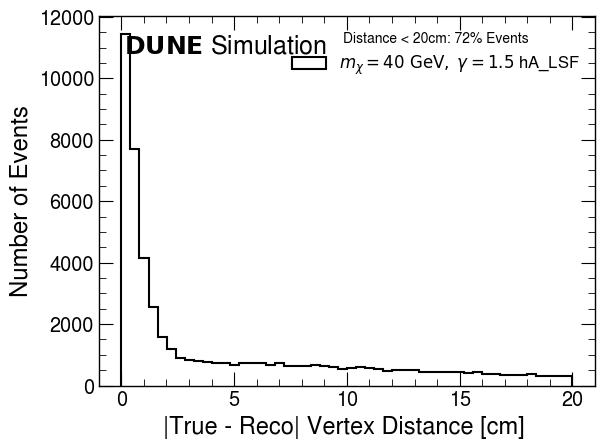

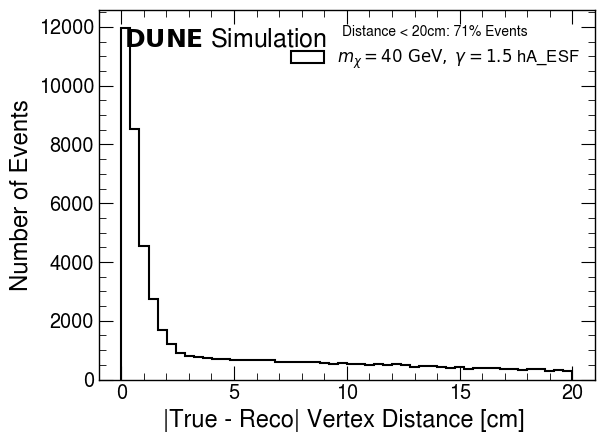

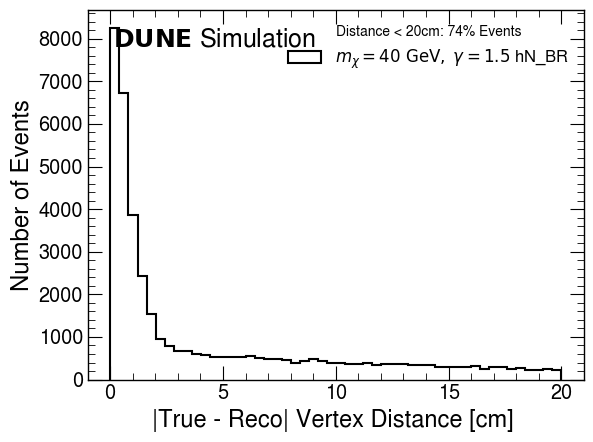

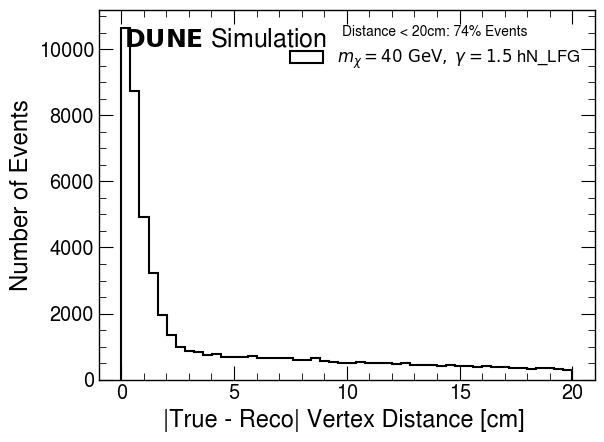

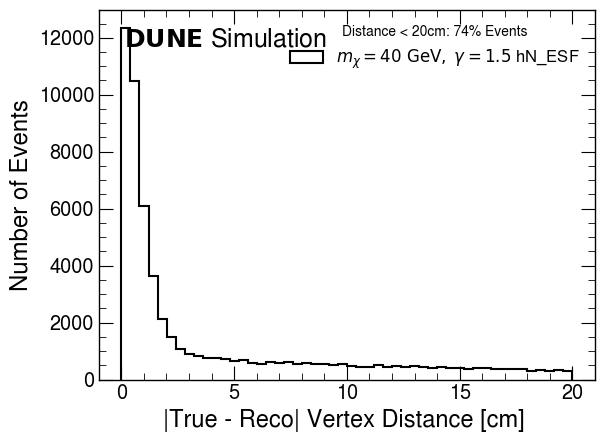

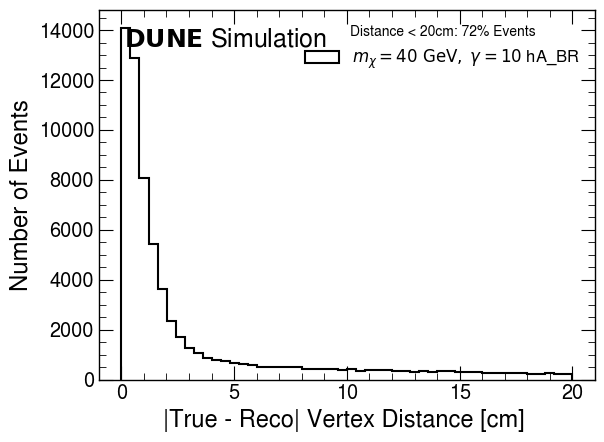

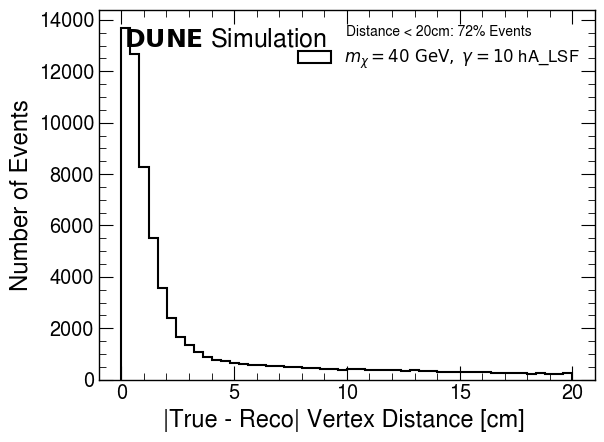

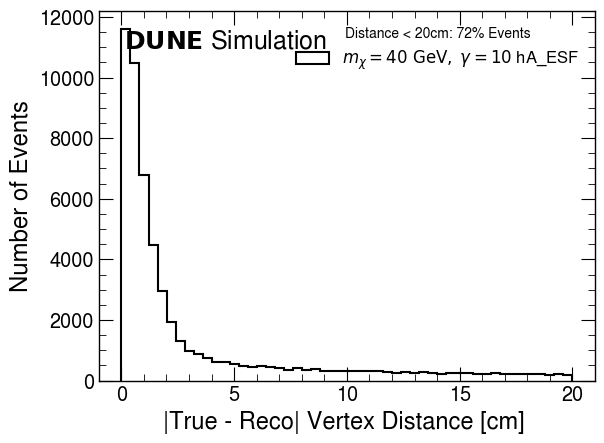

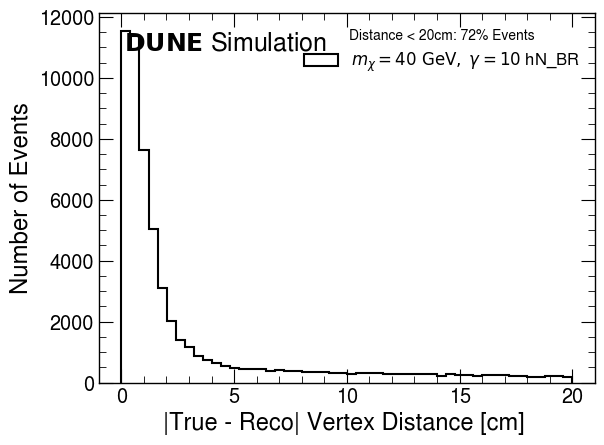

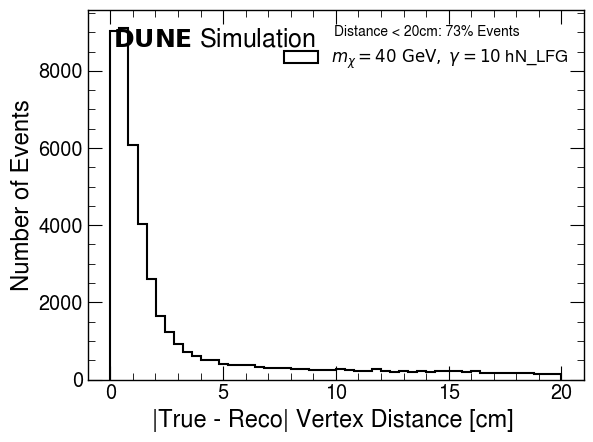

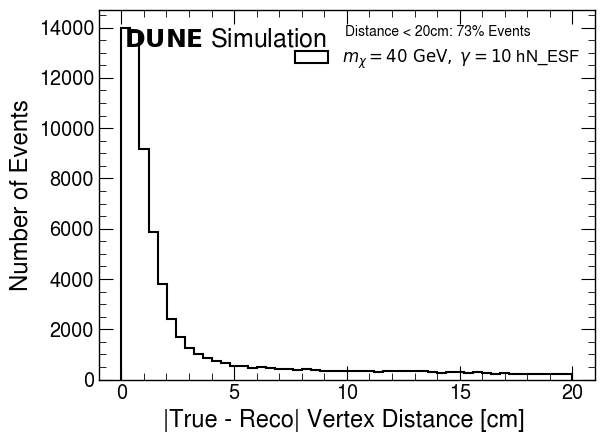

In [ ]:
def distance_cartesian(vec1,vec2):
    #print(vec1)
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.sqrt( (vec1[0]-vec2[0])**2+(vec1[1]-vec2[1])**2+(vec1[2]-vec2[2])**2 )

for SAMPLE_INDEX in range(0,12):
    infiles_list = ReadNuclearModelSamples(True, listsamples[SAMPLE_INDEX])
    intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
    intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
    reco_entries = [intree().GetEntries() for intree in intrees_reco]
        
    MCTrueVertexes = [GetNpArraysFromTrees2(func(),"MCInitialPositionNu") for func in intrees_reco]
    MCRecoVertexes = [GetNpArraysFromTrees2(func(),"PrimaryRecoVertex") for func in intrees_reco]
    
    VtxPos_True = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCTrueVertexes)]
    VtxPos_Reco = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCRecoVertexes)]
    
    DistReco = [[distance_cartesian(posvtx_true, posvtx_reco)  for posvtx_true, posvtx_reco in zip(nuclearmodelTrue,nuclearmodelReco)] for nuclearmodelTrue,nuclearmodelReco  in zip(VtxPos_True,VtxPos_Reco)]

    for idx, nuclearmodel_distReco in enumerate(DistReco):
        plt.figure()
        ax = plt.axes()
        dunestyle.Simulation()
        
        nuclearmodel_distReco = np.array(nuclearmodel_distReco)
        h = ax.hist(nuclearmodel_distReco[nuclearmodel_distReco < 20], bins = 50,histtype='step', label=list_samples_latex[SAMPLE_INDEX]+' '+list_nuclearmodels[idx])
        
        evtsless20 = 100*nuclearmodel_distReco[nuclearmodel_distReco < 20].size/ nuclearmodel_distReco.size 
        ax.set_xlabel(r'|True - Reco| Vertex Distance [cm] ', fontsize = 17)
        ax.set_ylabel('Number of Events')
        #ax.set_xscale('log')
        plt.legend(title=rf'Distance < 20cm: {evtsless20:.0f}% Events', loc='upper right')
        plt.savefig('AngularStudiesPlots/VtxDistanceReco_'+listsamples[SAMPLE_INDEX]+'_'+list_nuclearmodels[idx]+'.pdf', format='pdf', dpi=300)
        plt.show()
    

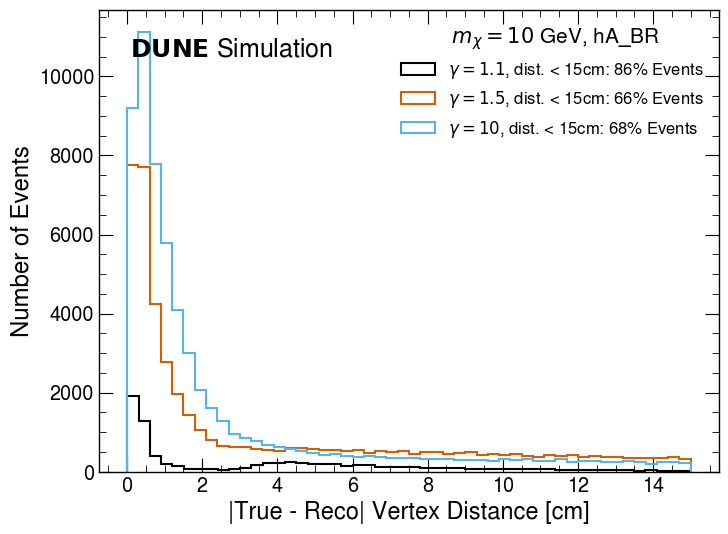

In [65]:
# Define the selected sample indices and nuclear model
selected_indices = [3, 4, 5]  # Indices corresponding to m10_b1p1, m10_b1p5, m10_b10
nuclear_model_index = 0  # Index for hA_BR

gammas = [r'$\gamma=1.1$', r'$\gamma=1.5$', r'$\gamma=10$']
# Create figure
plt.figure(figsize=(8, 6))
ax = plt.axes()
dunestyle.Simulation()

for SAMPLE_INDEX in selected_indices:
    infiles_list = ReadNuclearModelSamples(True, listsamples[SAMPLE_INDEX])
    intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
    intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
    reco_entries = [intree().GetEntries() for intree in intrees_reco]
        
    MCTrueVertexes = [GetNpArraysFromTrees2(func(),"MCInitialPositionNu") for func in intrees_reco]
    MCRecoVertexes = [GetNpArraysFromTrees2(func(),"PrimaryRecoVertex") for func in intrees_reco]
    
    VtxPos_True = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCTrueVertexes)]
    VtxPos_Reco = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCRecoVertexes)]
    
    DistReco = [[distance_cartesian(posvtx_true, posvtx_reco)  for posvtx_true, posvtx_reco in zip(nuclearmodelTrue,nuclearmodelReco)] for nuclearmodelTrue,nuclearmodelReco  in zip(VtxPos_True,VtxPos_Reco)]

    for idx, nuclearmodel_distReco in enumerate(DistReco):
        if idx != 0: continue
        
        nuclearmodel_distReco = np.array(nuclearmodel_distReco)
        #h = ax.hist(nuclearmodel_distReco[nuclearmodel_distReco < 20], bins = 50,histtype='step', label=list_samples_latex[SAMPLE_INDEX]+' '+list_nuclearmodels[idx])
        
        evtsless20 = 100*nuclearmodel_distReco[nuclearmodel_distReco < 15].size/ nuclearmodel_distReco.size 
        # Plot histogram
        ax.hist(
        nuclearmodel_distReco[nuclearmodel_distReco < 15], bins=50, histtype='step',
        label=gammas[SAMPLE_INDEX-3]+rf', dist. < 15cm: {evtsless20:.0f}% Events'
        )

# Labels
ax.set_xlabel(r'|True - Reco| Vertex Distance [cm]', fontsize=17)
ax.set_ylabel('Number of Events')
plt.legend(title=r' $m_\chi = 10$ GeV, hA_BR',title_fontsize=15, loc='upper right')
plt.savefig('AngularStudiesPlots/VtxDistanceReco_m10_combined.pdf', format='pdf', dpi=300)
plt.show()


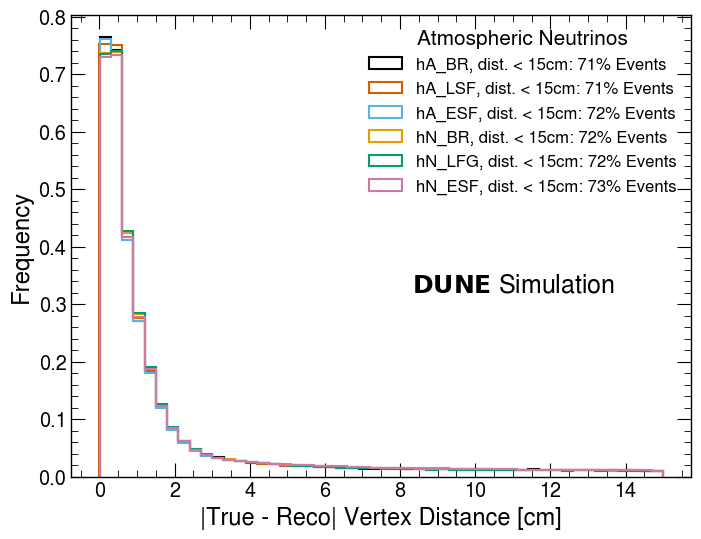

In [75]:

# Create figure
plt.figure(figsize=(8, 6))
ax = plt.axes()


infiles_list = ReadNuclearModelSamples(False)
intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
reco_entries = [intree().GetEntries() for intree in intrees_reco]
    
MCTrueVertexes = [GetNpArraysFromTrees2(func(),"MCInitialPositionNu") for func in intrees_reco]
MCRecoVertexes = [GetNpArraysFromTrees2(func(),"PrimaryRecoVertex") for func in intrees_reco]

VtxPos_True = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCTrueVertexes)]
VtxPos_Reco = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCRecoVertexes)]

DistReco = [[distance_cartesian(posvtx_true, posvtx_reco)  for posvtx_true, posvtx_reco in zip(nuclearmodelTrue,nuclearmodelReco)] for nuclearmodelTrue,nuclearmodelReco  in zip(VtxPos_True,VtxPos_Reco)]

for idx, nuclearmodel_distReco in enumerate(DistReco):
    #if idx != 0: continue
    
    nuclearmodel_distReco = np.array(nuclearmodel_distReco)
    #h = ax.hist(nuclearmodel_distReco[nuclearmodel_distReco < 20], bins = 50,histtype='step', label=list_samples_latex[SAMPLE_INDEX]+' '+list_nuclearmodels[idx])
    
    evtsless20 = 100*nuclearmodel_distReco[nuclearmodel_distReco < 15].size/ nuclearmodel_distReco.size 
    # Plot histogram
    ax.hist(
    nuclearmodel_distReco[nuclearmodel_distReco < 15], bins=50, histtype='step',
    label=list_nuclearmodels[idx]+rf', dist. < 15cm: {evtsless20:.0f}% Events',
    density =1
    )

# Labels
ax.set_xlabel(r'|True - Reco| Vertex Distance [cm]', fontsize=17)
ax.set_ylabel('Frequency')
dunestyle.Simulation(x= 0.55,y=0.4)
plt.legend(title=r'Atmospheric Neutrinos',title_fontsize=15, loc='upper right')
plt.savefig('AngularStudiesPlots/VtxDistance_AtmNu_combined.pdf', format='pdf', dpi=300)
plt.show()
